<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Keras_ANN_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preperation and Visualization

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


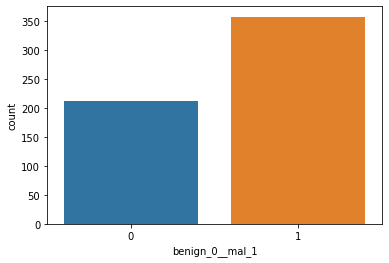

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

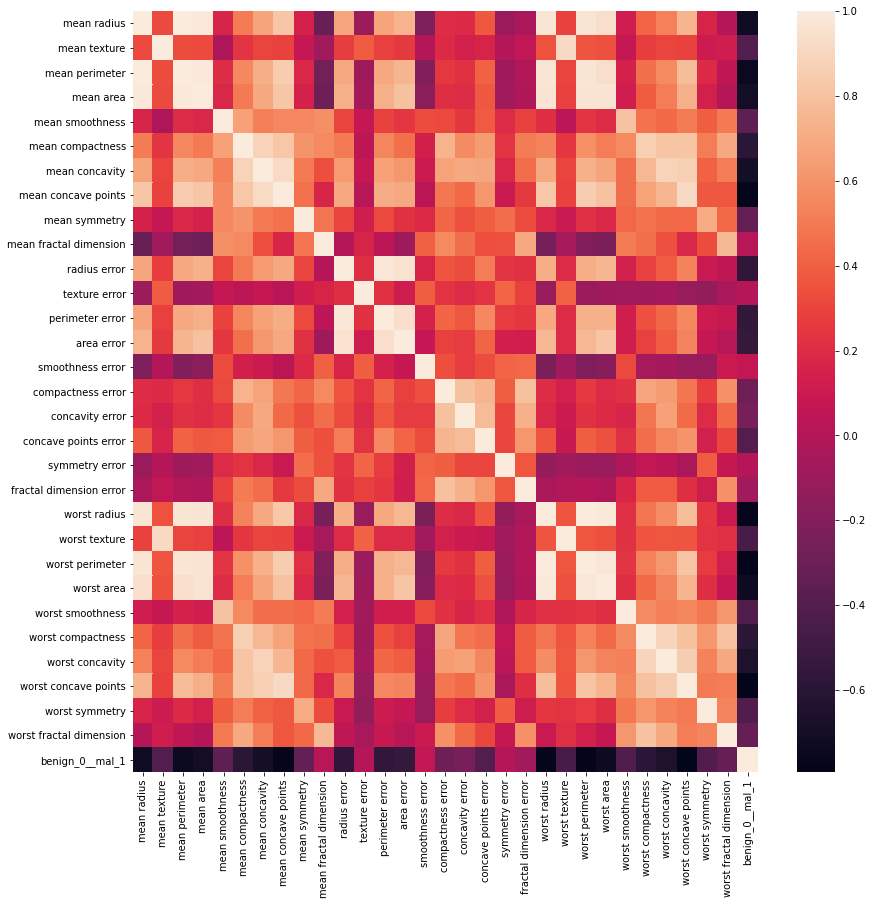

In [17]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr())

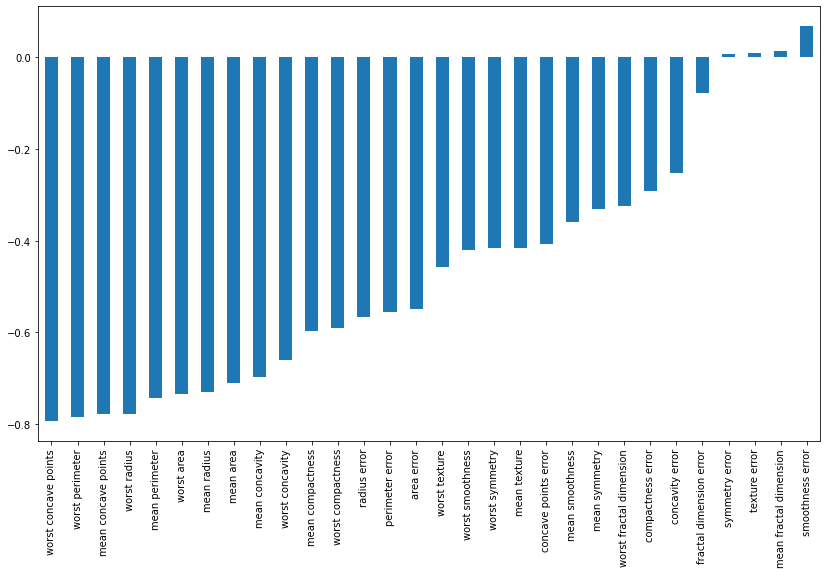

In [16]:
plt.figure(figsize=(14,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [21]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Dropout

In [31]:
X_train.shape

(426, 30)

## Neural Network

In [32]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [33]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6646 - val_loss: 0.6491
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6315 - val_loss: 0.6166
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5977 - val_loss: 0.5789
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5572 - val_loss: 0.5321
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5075 - val_loss: 0.4790
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4529 - val_loss: 0.4234
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3995 - val_loss: 0.3708
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3543 - val_loss: 0.3261
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3143 - val_loss: 0.2895
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2825 - val_loss: 0.2586
Epoch 11/

In [34]:
losses = pd.DataFrame(model.history.history)

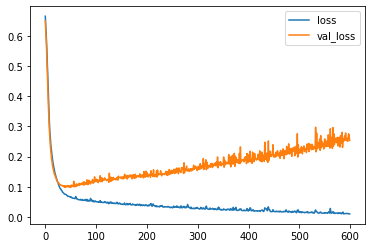

In [35]:
losses.plot()

Above plot shows overfitting starts at around 0.1 loss

## Using callback to prevent overfitting by breaking training

In [39]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [40]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6740 - val_loss: 0.6574
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6448 - val_loss: 0.6294
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6134 - val_loss: 0.5951
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5757 - val_loss: 0.5512
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5304 - val_loss: 0.4983
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4787 - val_loss: 0.4443
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4277 - val_loss: 0.3937
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3481
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3415 - val_loss: 0.3127
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3089 - val_loss: 0.2794
Epoch 11/

In [41]:
model_loss = pd.DataFrame(model.history.history)

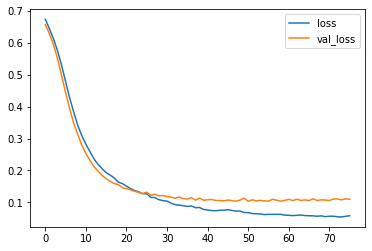

In [42]:
model_loss.plot()

## Using Dropout layers to prevent overfitting further

In [43]:
from tensorflow.keras.layers import Dropout

In [44]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [45]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6954 - val_loss: 0.6861
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6872 - val_loss: 0.6728
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6702 - val_loss: 0.6585
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6525 - val_loss: 0.6362
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6417 - val_loss: 0.6150
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6167 - val_loss: 0.5862
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5949 - val_loss: 0.5572
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5790 - val_loss: 0.5305
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5583 - val_loss: 0.5046
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5177 - val_loss: 0.4707
Epoch 11/

In [46]:
model_loss = pd.DataFrame(model.history.history)

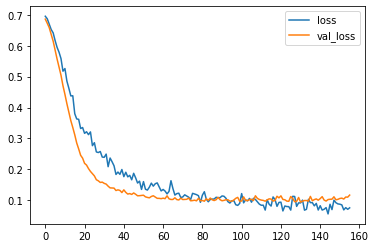

In [47]:
model_loss.plot()

In [52]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [54]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
